In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# clone YOLOv8 repo
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 23085, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 23085 (delta 54), reused 66 (delta 29), pack-reused 22968
Receiving objects: 100% (23085/23085), 13.70 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (16145/16145), done.
/content/ultralytics


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
import torch

from IPython.display import Image, clear_output

print(torch.__version__)

2.2.1+cu121


In [5]:
pwd

'/content/ultralytics'

In [6]:
%cd /content

/content


In [7]:
import gdown

url="https://drive.google.com/file/d/1OXfaKZf304XetURPbH13RR5DArvBqSJC/view?usp=sharing"
file_id = url.split("/")[-2]
file_id
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id)
print("Data downloaded")

#'https://drive.usercontent.google.com/u/0/uc?id=1OXfaKZf304XetURPbH13RR5DArvBqSJC&export=download'


Downloading...
From: https://drive.google.com/uc?/export=download&id=1OXfaKZf304XetURPbH13RR5DArvBqSJC
To: /content/objectDetection.zip
100%|██████████| 21.6M/21.6M [00:00<00:00, 75.7MB/s]

Data downloaded


In [8]:
# Unzip the file and delete the zip file
!unzip  objectDetection.zip
!rm -rf objectDetection.zip

Archive:  objectDetection.zip
  inflating: data.yaml               
  inflating: test/images/AightSird0434_jpg.rf.286ba3231cf4dfd80fe56510331ba97f.jpg  
  inflating: test/images/construction-worker1_grande_jpg.rf.f43b70bd3076dfcc8efdd861da16a706.jpg  
  inflating: test/images/image_108_jpg.rf.9b781eb6c506382f590bd0c2ee26d993.jpg  
  inflating: test/images/image_163_jpg.rf.46e56d0dc0ca466bcd7f2f44010fe1e6.jpg  
  inflating: test/images/image_168_jpg.rf.987fbaec5305cefed082f797db215109.jpg  
  inflating: test/images/image_169_jpg.rf.0947795dd7eb6507ce2540fd8b4370bc.jpg  
  inflating: test/images/image_169_jpg.rf.9b043b5febbe4e7084d5dca3ef02809c.jpg  
  inflating: test/images/image_169_jpg.rf.a903e9ad41f3cd92167303e0ef415397.jpg  
  inflating: test/images/image_171_jpg.rf.b96baab9abe38e160b9ece7c815cc4f1.jpg  
  inflating: test/images/image_181_jpg.rf.a1391261b563bd0d1370c277a09c418c.jpg  
  inflating: test/images/image_183_jpg.rf.6d5ca81a8567aa7c4fa747e910c33db8.jpg  
  inflating: test/i

In [9]:
# Read data.yaml file
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 9
names: ['gloves', 'hardhat', 'no-gloves', 'no-hardhat', 'no-shoes', 'no-vest', 'person', 'shoes', 'vest']

# roboflow:
#   workspace: alvin-umali-rlxmp
#   project: ppe-safety-qzvxd
#   version: 1
#   license: CC BY 4.0
#   url: https://universe.roboflow.com/alvin-umali-rlxmp/ppe-safety-qzvxd/dataset/1

In [10]:
import yaml
with open("data.yaml","r") as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

In [11]:
num_classes

'9'

In [12]:
%cat /content/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 9
names: ['gloves', 'hardhat', 'no-gloves', 'no-hardhat', 'no-shoes', 'no-vest', 'person', 'shoes', 'vest']

# roboflow:
#   workspace: alvin-umali-rlxmp
#   project: ppe-safety-qzvxd
#   version: 1
#   license: CC BY 4.0
#   url: https://universe.roboflow.com/alvin-umali-rlxmp/ppe-safety-qzvxd/dataset/1

In [13]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 175MB/s]


In [15]:
model.train(data="data.yaml",epochs=1)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

train: Scanning /content/train/labels.cache... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.775      3.955      1.665          3        640: 100%|██████████| 14/14 [03:12<00:00, 13.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.30s/it]


                   all         60        420     0.0141      0.187      0.105     0.0767

1 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.56s/it]


                   all         60        420     0.0142      0.187      0.105     0.0769
                gloves         60         76          0          0          0          0
               hardhat         60         38    0.00155      0.105    0.00962    0.00574
             no-gloves         60         35   0.000143     0.0286    0.00632   0.000632
            no-hardhat         60         32          0          0          0          0
               no-vest         60         10    0.00117        0.2    0.00143   0.000668
                person         60         68      0.105      0.971      0.814      0.605
                 shoes         60         98    0.00266     0.0204     0.0014   0.000687
                  vest         60         63    0.00327      0.175    0.00639    0.00237
Speed: 5.9ms preprocess, 258.6ms inference, 0.0ms loss, 28.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7c7240c370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

Ground Truth Data:


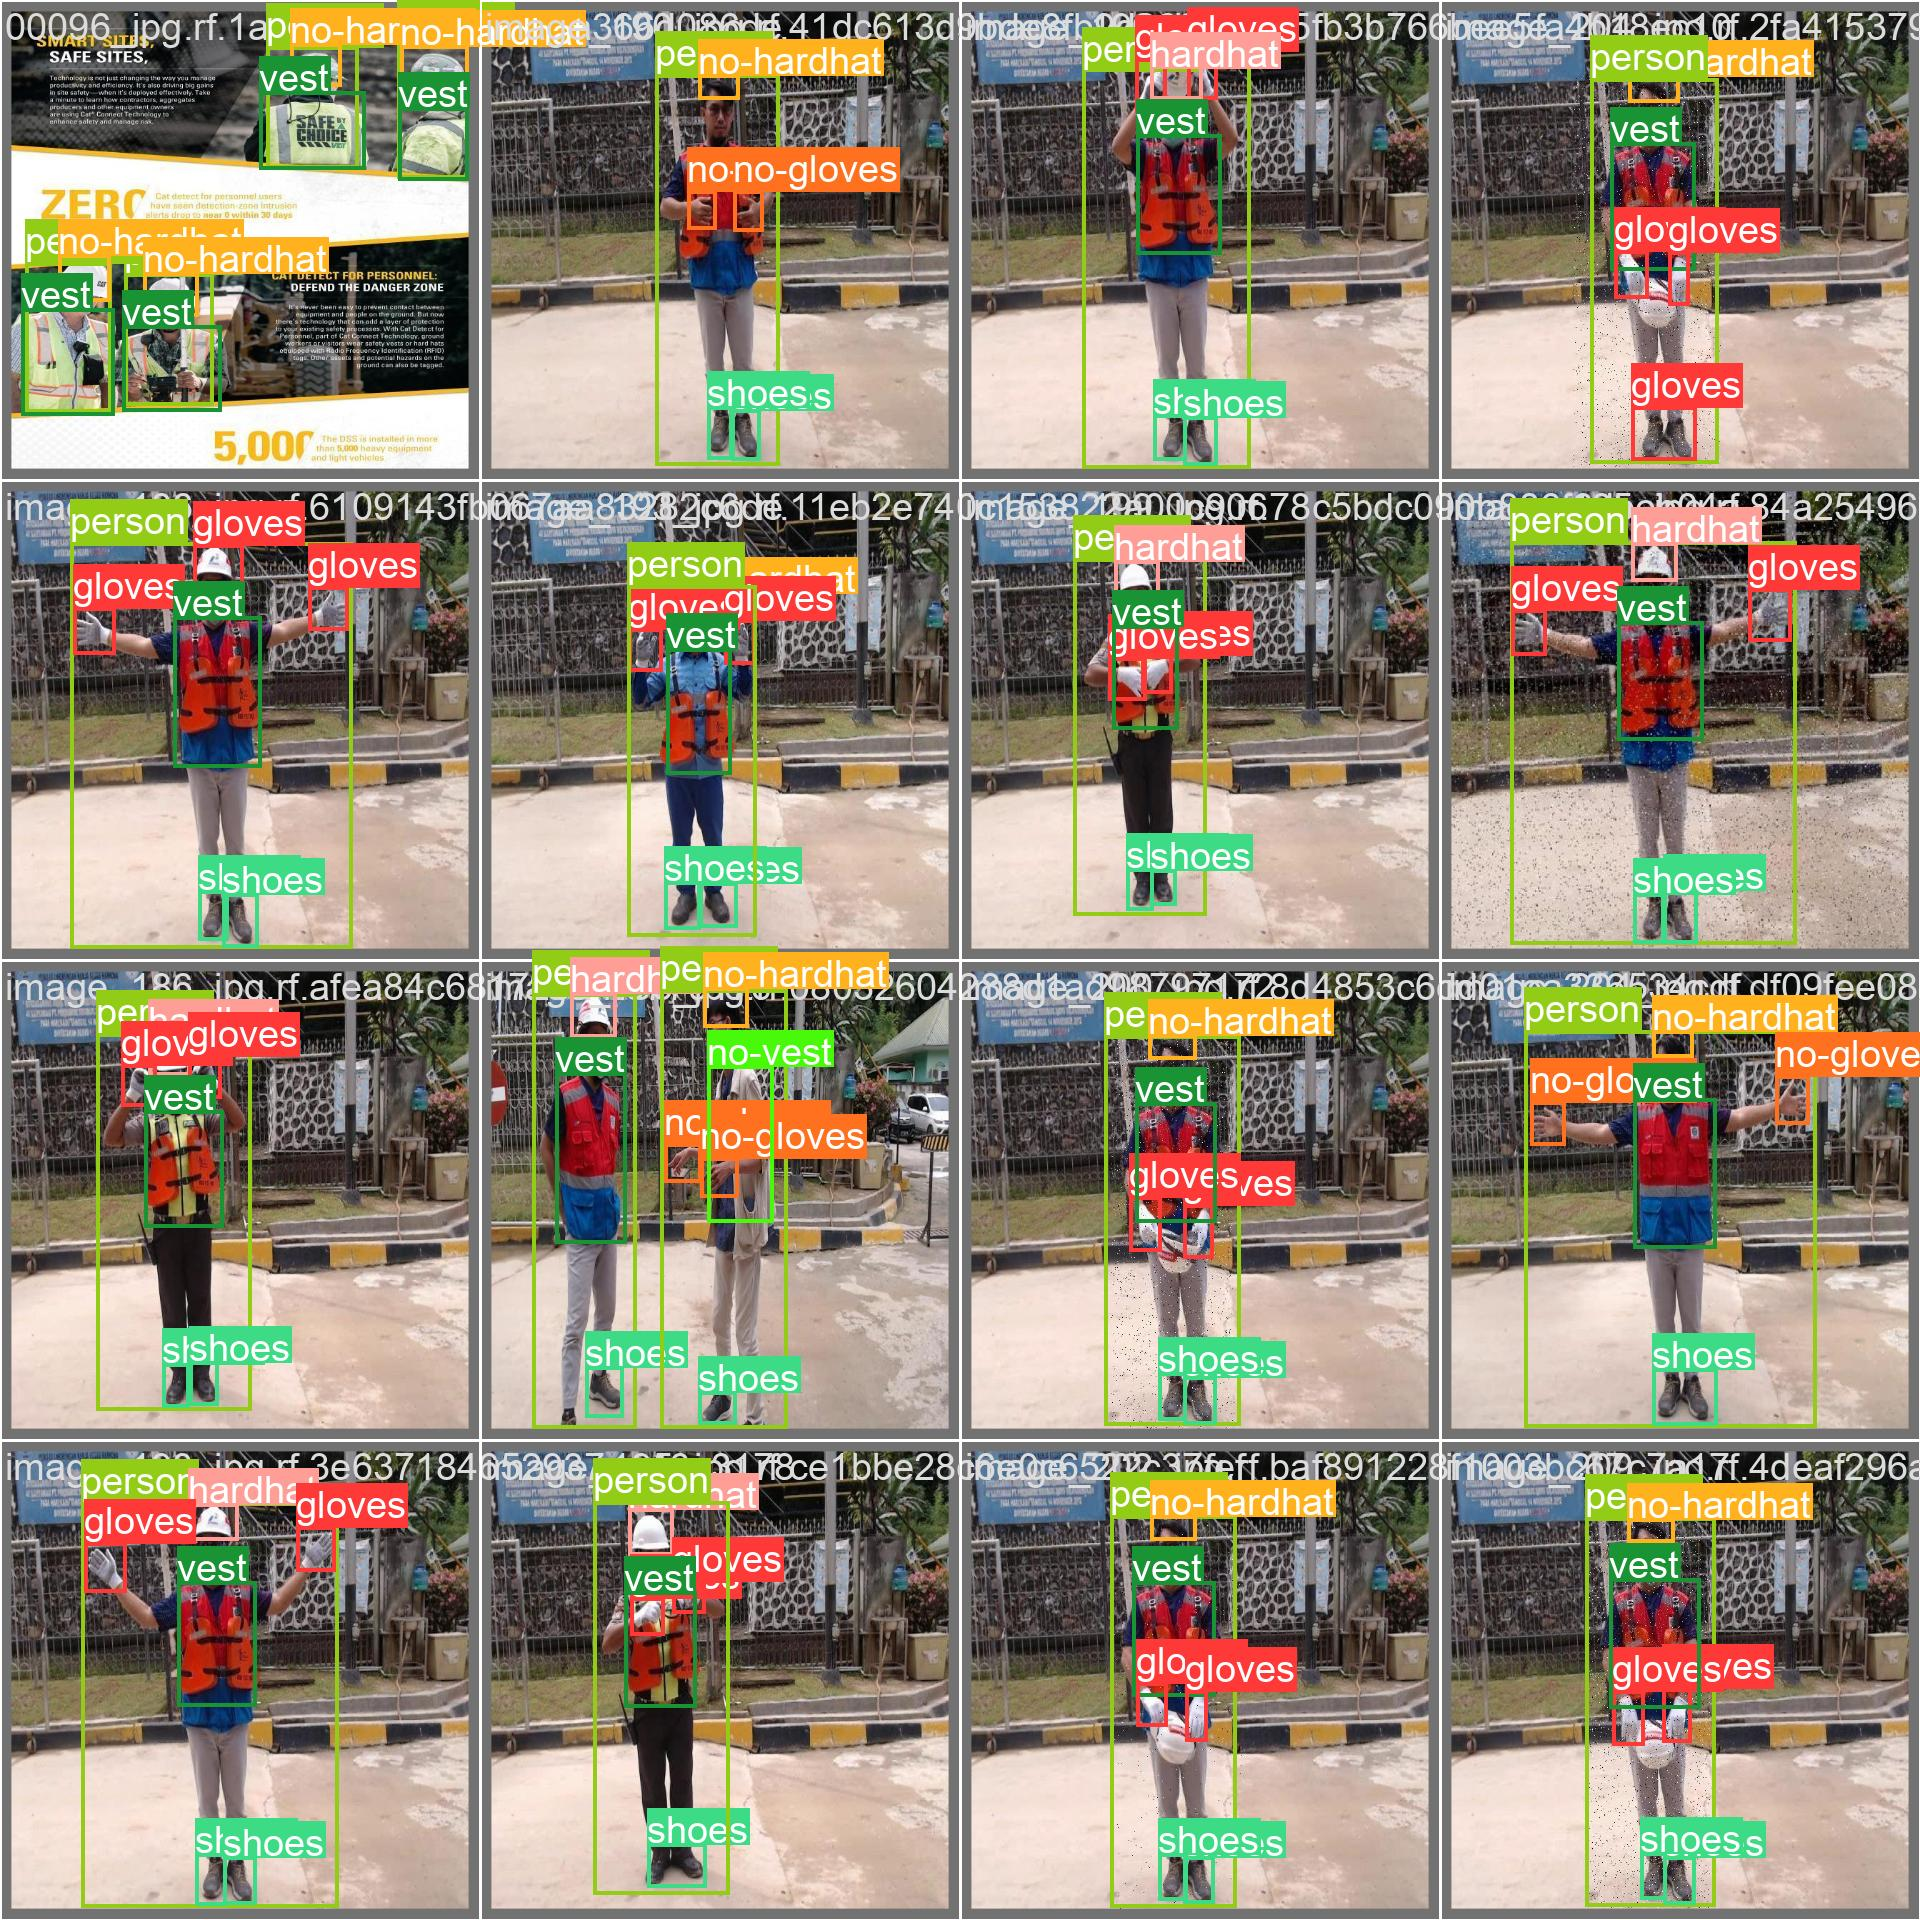

In [18]:
print("Ground Truth Data:")
Image(filename="/content/runs/detect/train2/val_batch0_labels.jpg", width=900)

In [24]:
model.predict(model="/content/runs/detect/train2/weights/best.pt", source="/content/train/images")


image 1/209 /content/train/images/00000383_jpg.rf.16443261255a74f1f3d4ca0bbb83ab7e.jpg: 640x640 (no detections), 276.4ms
image 2/209 /content/train/images/00016_jpg.rf.b7f1089280d4bb04537e6150de6aec0f.jpg: 640x640 (no detections), 231.9ms
image 3/209 /content/train/images/00016_jpg.rf.f2fe5beb825a6d958f89ba881aeafa8a.jpg: 640x640 (no detections), 227.4ms
image 4/209 /content/train/images/00027_jpg.rf.5c7440bcf1b739028d58dc42fa43515f.jpg: 640x640 (no detections), 227.2ms
image 5/209 /content/train/images/00041_jpg.rf.6bac2b94c5b3e98a8aab8ec283faddf9.jpg: 640x640 (no detections), 228.0ms
image 6/209 /content/train/images/00048_jpg.rf.136a557f41c3063dc582236aa267d6eb.jpg: 640x640 (no detections), 240.7ms
image 7/209 /content/train/images/00059_jpg.rf.8b07d75347a2eb550b494c59a9419f6b.jpg: 640x640 (no detections), 234.0ms
image 8/209 /content/train/images/00090_jpg.rf.865ee8bfd709247f826599aa68e4ea50.jpg: 640x640 (no detections), 235.8ms
image 9/209 /content/train/images/00091_jpg.rf.289af

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'gloves', 1: 'hardhat', 2: 'no-gloves', 3: 'no-hardhat', 4: 'no-shoes', 5: 'no-vest', 6: 'person', 7: 'shoes', 8: 'vest'}
 obb: None
 orig_img: array([[[150, 163, 165],
         [144, 159, 161],
         [163, 181, 182],
         ...,
         [ 96,  97, 107],
         [ 81,  82,  92],
         [ 81,  82,  92]],
 
        [[155, 168, 170],
         [149, 164, 166],
         [164, 182, 183],
         ...,
         [ 93,  94, 104],
         [ 77,  78,  88],
         [ 77,  78,  88]],
 
        [[119, 132, 134],
         [113, 128, 130],
         [121, 139, 140],
         ...,
         [ 95,  96, 106],
         [ 81,  82,  92],
         [ 80,  81,  91]],
 
        ...,
 
        [[ 83,  97, 119],
         [ 78,  92, 114],
         [ 75,  89, 111],
         ...,
         [127, 140, 172],
         [127, 140, 172],
         [127, 140, 172]],
